# **Autoencoders:**

Autoencoders are a class of neural networks basically used for dimensionality reduction. The primary objective is to encode input into a lower dimensional representation and then reconstruct the input data as accurately as possible from that representation. The architecture consists of an encoder, a bottleneck and a decoder.


The encoder consists of fully connected or convolutional layers and maps the input data into a lower-dimensional representation, known as the latent space where the essential features of the input are encoded. The decoder consists of neural layers that mirror those of the encoder which takes the encoded representation from the latent space and reconstructs the original input.

Autoencoders are dtrained to minimize a loss function which is here known as 'reconstruction loss'. By appropriately choosing how the reconstruction loss is measured, the generative nature of the decoder can be used in various applications like:


*   Signal compression
*   Denoising images
*   Anomaly detection
*   Neural impainting
*   Domain adaptation
*   Image colorization and so on







**Autoencoder for CIFAR-10 dataset:**

Fully connected layers gave poor results

Reducing the image size beyond 8 x 8 x channels degrades performance

Shallow autoencoders give good results

Reconstruction loss: **0.0026** with a latent space of 8x8x16

In [ ]:
from keras.datasets import cifar10

In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dropout, BatchNormalization

In [ ]:
(X_train, y_train), (X_test, y_test)=cifar10.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
model = Sequential()

# encoder
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D (16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

# decoder
model.add(Conv2D(16, (3, 3), activation= 'relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation= 'relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation= 'relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 8, 8, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 up_sampling2d_12 (UpSampli  (None, 16, 16, 16)       

In [ ]:
model.fit(X_train, X_train, epochs=20, shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0101 - accuracy: 0.6910
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0050 - accuracy: 0.7721
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0044 - accuracy: 0.7899
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0040 - accuracy: 0.7984
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0037 - accuracy: 0.8048
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0035 - accuracy: 0.8082
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0034 - accuracy: 0.8099
Epoch 8/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0033 - accuracy: 0.8114
Epoch 9/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0032 - accuracy: 0.8123
Epoch 10/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.003

In [ ]:
pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


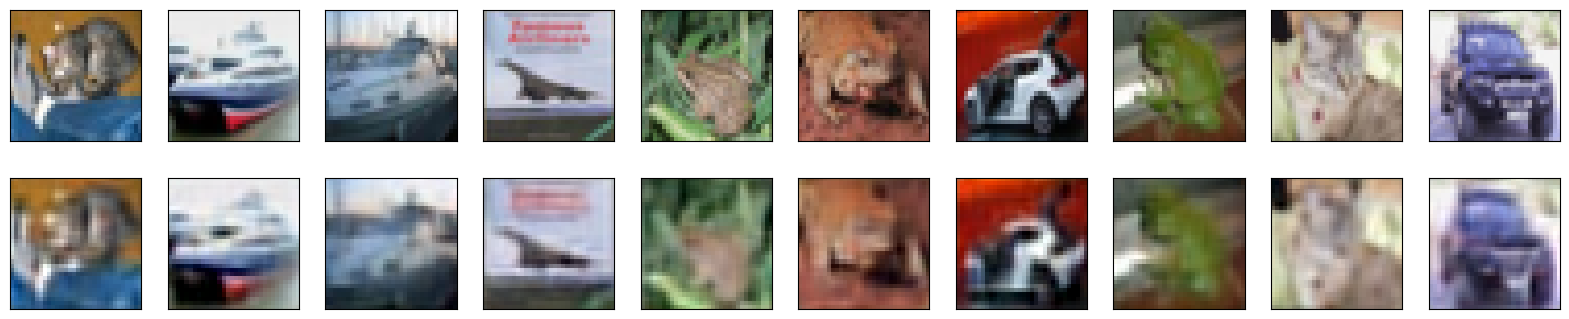

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
for i in range(10):
  # original image
  ax=plt.subplot(2, 10, i+1)
  plt.imshow(X_test[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # decoded image
  ax=plt.subplot(2, 10, i+1+10)
  plt.imshow(pred[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()